<a href="https://colab.research.google.com/github/kimp10/personal-codes/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Import  libraries</h1><a id = "1" ></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
colors = ['#006E7F','#F8CB2E','#EE5007', '#37E2D5', '#14C38E','#B22727']
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Interview Case Study/

/content/drive/My Drive/Colab Notebooks/Interview Case Study


In [5]:
ls

'Case Study.docx'   'Customer Info.csv'           'Customer Transactions.txt'  'EDA 1.jpg'
'Case Study.ipynb'  'Customer Interactions.xlsx'   df_final.csv                'Lookup Table.xlsm'


### Reading the datasets

In [12]:
Customer_info = pd.read_csv('Customer Info.csv', sep = '|')

In [13]:

Customer_info.head()

,CustomerCode,Transaction_ID,Interactions_ID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category
0,818770008,38760,29070,49,F,5,Graduate,Single,Less than R40K
1,713982108,12044,9033,51,M,3,Graduate,Married,R80K - R120K
2,709106358,1968,1476,40,M,3,Uneducated,Married,R60K - R80K
3,710930508,5536,4152,37,M,3,Uneducated,Single,R60K - R80K
4,710821833,5320,3990,65,M,1,Unknown,Married,R40K - R60K


In [14]:
customer_transaction = pd.read_csv('Customer Transactions.txt', sep = '\t')

In [15]:
customer_transaction.head()

,Transaction_ID,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit,Card_Category,Months_on_book
0,NaN,777,11914.0,1.335,1144,42,1.625,0.061,12691.0,Blue,39
1,38760.0,864,7392.0,1.541,1291,33,3.714,0.105,8256.0,Blue,44
2,12044.0,0,3418.0,2.594,1887,20,2.333,0.000,3418.0,Blue,36
3,NaN,2517,796.0,1.405,1171,20,2.333,0.760,3313.0,Blue,34
4,1968.0,0,4716.0,2.175,816,28,2.500,0.000,4716.0,Blue,21


In [22]:
customer_interactions = pd.read_excel('Customer Interactions.xlsx')

In [23]:
customer_interactions.head()

,Interactions_ID,Attrition_Flag,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Reason,Combo_Field
0,NaN,Existing Customer,5,1,3,1,5*1*3*12691*Blue*39*1
1,29070.0,Existing Customer,6,1,2,1,6*1*2*8256*Blue*44*1
2,9033.0,Existing Customer,4,1,0,1,4*1*0*3418*Blue*36*1
3,NaN,Existing Customer,3,4,1,1,3*4*1*3313*Blue*34*1
4,1476.0,Existing Customer,5,1,0,1,5*1*0*4716*Blue*21*1


#### Data Integration

In [24]:

merge_data_1 = pd.merge(Customer_info, customer_transaction, on = 'Transaction_ID', how= 'left')

In [25]:
final_data = pd.merge(merge_data_1, customer_interactions, on='Interactions_ID', how='left')


In [26]:
final_data.head()

,CustomerCode,Transaction_ID,Interactions_ID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Total_Revolving_Bal,...,Avg_Utilization_Ratio,Credit_Limit,Card_Category,Months_on_book,Attrition_Flag,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Reason,Combo_Field
0,818770008,38760,29070,49,F,5,Graduate,Single,Less than R40K,864,...,0.105,8256.0,Blue,44,Existing Customer,6,1,2,1,6*1*2*8256*Blue*44*1
1,713982108,12044,9033,51,M,3,Graduate,Married,R80K - R120K,0,...,0.000,3418.0,Blue,36,Existing Customer,4,1,0,1,4*1*0*3418*Blue*36*1
2,709106358,1968,1476,40,M,3,Uneducated,Married,R60K - R80K,0,...,0.000,4716.0,Blue,21,Existing Customer,5,1,0,1,5*1*0*4716*Blue*21*1
3,710930508,5536,4152,37,M,3,Uneducated,Single,R60K - R80K,2517,...,0.113,22352.0,Blue,36,Existing Customer,5,2,0,1,5*2*0*22352*Blue*36*1
4,710821833,5320,3990,65,M,1,Unknown,Married,R40K - R60K,1587,...,0.174,9095.0,Blue,54,Existing Customer,6,2,3,1,6*2*3*9095*Blue*54*1


In [27]:
desired_columns = [
    'Transaction_ID', 'Interactions_ID', 'Attrition_Flag', 'Customer_Age',
    'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

df= final_data[desired_columns]

In [28]:
df.head()

,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,38760,29070,Existing Customer,49,F,5,Graduate,Single,Less than R40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
1,12044,9033,Existing Customer,51,M,3,Graduate,Married,R80K - R120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
2,1968,1476,Existing Customer,40,M,3,Uneducated,Married,R60K - R80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
3,5536,4152,Existing Customer,37,M,3,Uneducated,Single,R60K - R80K,Blue,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
4,5320,3990,Existing Customer,65,M,1,Unknown,Married,R40K - R60K,Blue,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174


In [29]:
df.tail()

,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9994,29676,22257,Existing Customer,50,M,2,Graduate,Single,R40K - R60K,Blue,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
9995,4880,3660,Attrited Customer,41,M,2,Unknown,Divorced,R40K - R60K,Blue,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
9996,17368,13026,Attrited Customer,44,F,1,High School,Married,Less than R40K,Blue,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
9997,19100,14325,Attrited Customer,30,M,2,Graduate,Unknown,R40K - R60K,Blue,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
9998,12860,9645,Attrited Customer,43,F,2,Graduate,Married,Less than R40K,Silver,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [41]:
df.shape

(9999, 22)

# <h1  style="text-align: center" class="list-group-item list-group-item-action active">2. Exploratory data analysis</h1><a id = "2" ></a>

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Transaction_ID            9999 non-null   int64  
 1   Interactions_ID           9999 non-null   int64  
 2   Attrition_Flag            9999 non-null   object 
 3   Customer_Age              9999 non-null   int64  
 4   Gender                    9999 non-null   object 
 5   Dependent_count           9999 non-null   int64  
 6   Education_Level           9999 non-null   object 
 7   Marital_Status            9999 non-null   object 
 8   Income_Category           9999 non-null   object 
 9   Card_Category             9999 non-null   object 
 10  Months_on_book            9999 non-null   int64  
 11  Total_Relationship_Count  9999 non-null   int64  
 12  Months_Inactive_12_mon    9999 non-null   int64  
 13  Contacts_Count_12_mon     9999 non-null   int64  
 14  Credit_L

In [46]:
# checking for duplicated values
df.duplicated().sum()

0

In [48]:
invalid_ages = df[df['Customer_Age']<0|(df['Customer_Age']>120)]


,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio




#### Checking for Null Values

In [32]:
df.isnull().sum()

,0
Transaction_ID,0
Interactions_ID,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0


There were no Null values in the dataset

#### Checking for unique values

In [33]:
df.nunique()

,0
Transaction_ID,9999
Interactions_ID,9999
Attrition_Flag,2
Customer_Age,43
Gender,2
Dependent_count,6
Education_Level,7
Marital_Status,4
Income_Category,6
Card_Category,4




1.  Transaction_ID: This is a unique identifier for each transaction and likely doesn't have predictive power for attrition. It can be useful for referencing specific transactions but not for modeling.
2.   Interactions_ID: Similar to Transaction_ID, this is a unique identifier for each interaction and probably doesn't contribute to predicting attrition.


In [34]:
df[df.duplicated()]

,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [42]:
# check the proportion of 'unknown' value
df.apply(lambda x: sum(x=='Unknown') / len(df))

,0
Transaction_ID,0.000000
Interactions_ID,0.000000
Attrition_Flag,0.000000
Customer_Age,0.000000
Gender,0.000000
Dependent_count,0.000000
Education_Level,0.150215
Marital_Status,0.073707
Income_Category,0.110011
Card_Category,0.000000


In [45]:
df[df['Marital_Status']=='Unknown']

,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
15,14716,11037,Existing Customer,57,F,1,Graduate,Unknown,R40K - R60K,Blue,...,3,2,3672.0,886,2786.0,1.320,1464,28,0.556,0.241
30,23088,17316,Existing Customer,54,M,1,Graduate,Unknown,R60K - R80K,Blue,...,2,3,2910.0,2030,880.0,0.769,1256,21,0.400,0.698
37,14652,10989,Existing Customer,44,M,1,Unknown,Unknown,R120K +,Blue,...,2,2,34516.0,1533,32983.0,0.924,1603,29,0.526,0.044
61,5272,3954,Existing Customer,50,F,1,Uneducated,Unknown,Less than R40K,Silver,...,2,2,11888.0,2090,9798.0,0.700,1137,30,0.765,0.176
110,33032,24774,Existing Customer,44,M,3,Graduate,Unknown,R80K - R120K,Blue,...,3,3,34516.0,0,34516.0,0.483,1120,27,0.350,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,27108,20331,Existing Customer,47,M,3,High School,Unknown,R80K - R120K,Silver,...,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
9972,23612,17709,Existing Customer,39,M,2,Graduate,Unknown,R60K - R80K,Silver,...,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
9973,20828,15621,Existing Customer,42,M,2,Graduate,Unknown,R40K - R60K,Blue,...,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
9990,11520,8640,Attrited Customer,50,M,1,Unknown,Unknown,R80K - R120K,Blue,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


Fortunately, there is no null values or duplicated records can be found in the dataset. We can say that the data is clean. however, we can see 'Unknown' (string) values in Education_Level, Marital_Status,and Income_Category features. Since we are only going to explore the data, I decided to keep the value.

Note: But it is necessary to alter the 'Unknown' string in the data preparation step before running the model for a better score.

In a normal distribution:

	•	About 68% of the data falls within 1 standard deviation of the mean ( Z  between -1 and 1).
	•	About 95% falls within 2 standard deviations ( Z  between -2 and 2).
	•	About 99.7% falls within 3 standard deviations ( Z  between -3 and 3).

Given this distribution:

	•	Data points with a Z-score greater than 3 or less than -3 are very rare and are considered outliers.

In [38]:
# Exclude categorical columns and other non-numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=[np.number])

# Z-Score Method
z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())

# Identify outliers (Z-score > 3)
outliers_z = z_scores > 3

# Extract rows that contain outliers
outliers_z_data = numeric_columns[outliers_z.any(axis=1)]

In [39]:


# Show the results
outliers_z_data.shape

(790, 16)

There are about 790 Outliers within 16 columns

In [41]:
fig = px.pie(df,names='Attrition_Flag',title='Percentage of Existing and Attrited Customers',hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
print('Total number of customers:',df['Attrition_Flag'].count())
print(df['Attrition_Flag'].value_counts())

Total number of customers: 9999
Attrition_Flag
Existing Customer    8382
Attrited Customer    1617
Name: count, dtype: int64


We can see the length of Attrited Customers is 1617 which means there are 1617 Attrited customers in the dataset. And the length of existing customers is 8382 which means there are 8382 existing customers in the dataset. obviously, this is an unbalanced dataset.


Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

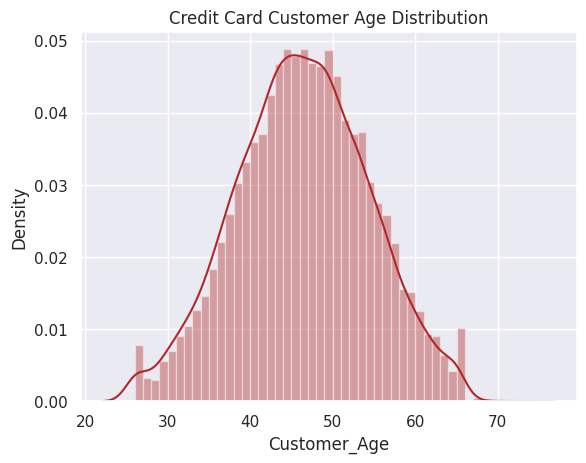

In [46]:
# customers' distribution by Age

sns.distplot(df['Customer_Age'], color=colors[5])
plt.title('Credit Card Customer Age Distribution')

The age of customers is normally distributed. As shown by most of the customers' age clustered around the mean value. (between 40 to 60). Thus, further use of the age feature can be done with the normality assumption

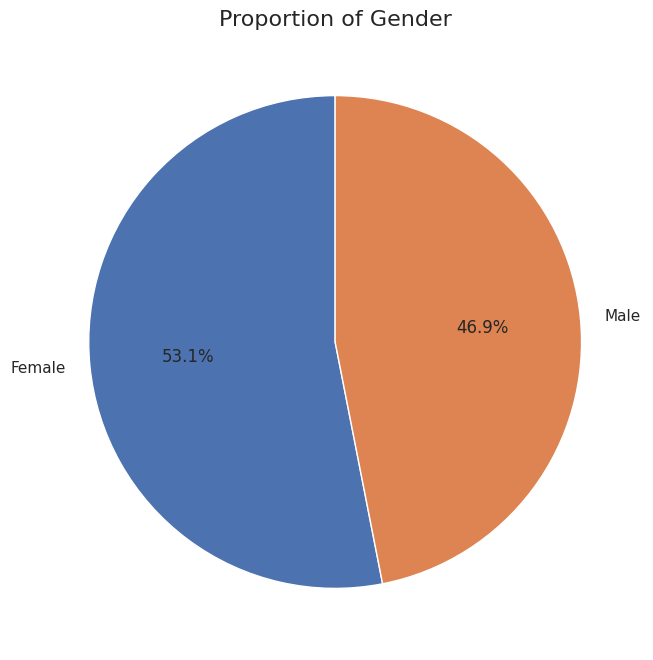

<Axes: xlabel='Attrition_Flag', ylabel='Gender'>

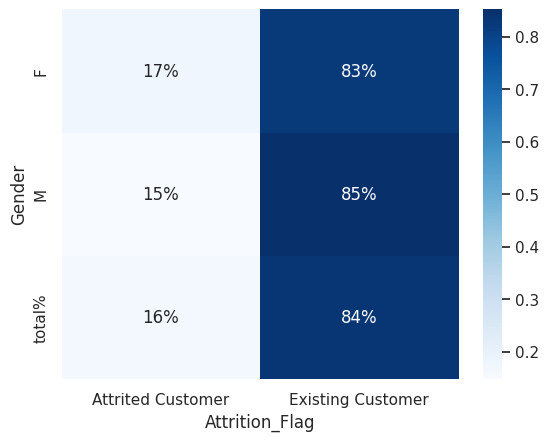

In [48]:
# Customers' Distribution  based on Gender
plt.figure(figsize = (8,8))
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Gender', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each gender category
cross = pd.crosstab(df['Gender'],
            df['Attrition_Flag'],
            margins = True,
            margins_name = "total%",
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

Based on the pie chart, we can see that the population of Female group is slightly bigger than Male group. moreover churning probablity in female customer also show slightly higher than male customer.

#### Education Level-Based Customers Distribution


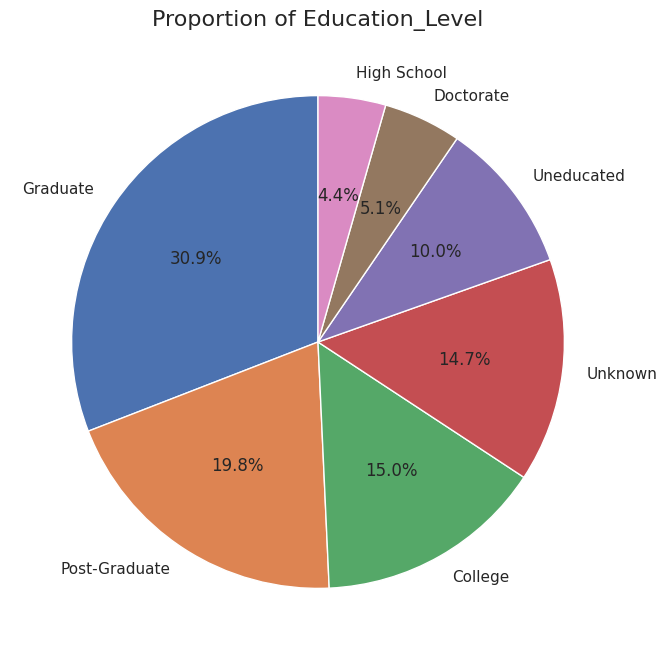

<Axes: xlabel='Attrition_Flag', ylabel='Education_Level'>

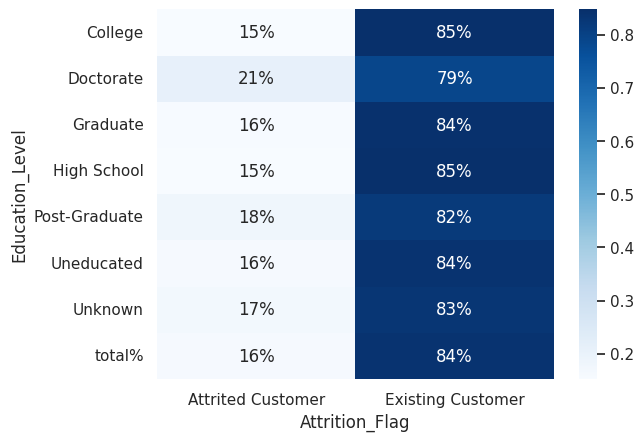

In [53]:
# Customers' Distribution  based on Education Level
plt.figure(figsize = (8,8))
plt.pie(df['Education_Level'].value_counts(),
        labels = ['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated','Doctorate', 'High School'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Education_Level', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Education_Level'],
            df['Attrition_Flag'],
            margins = True,
            margins_name = "total%",
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

More than 30% of customers have a graduate level of education and represent the majority in this data. However, even though the graduate group has the highest proportion in this data, it is the doctorate group who shows the highest probability of churn compared to other groups.

#### Transaction Behaviour


In [56]:
#define categorical columns
cat_cols = list(df.select_dtypes('object'))
cat_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']